In [1]:
#IMPORTING LIBRARIES

import  pandas as pd
import numpy as np

In [2]:
#IMPORTING DATA SET AND CREATING DATA FRAME
#we use the bank-additional-full.csv because it's the most comprehensive,more recent and has more features

df= pd.read_csv(r"C:\Users\michael bamfo\Desktop\azubi\nmop\data\bank-additional-full.csv",sep=';')

In [3]:
#EXPLORING THE DATA SET

df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

(41188, 21)

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#CHECKING FOR MISSING VALUES

#finding percentage of missing value 
#if percentage of missing value is >50% we drop the column

df.isnull().sum()/df.shape[0]*100

age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

In [6]:
#CATEGORICAL FEATURES AND THEIR UNIQUE VALUES
for col in df.select_dtypes(include=['object']).columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [7]:
# handling "unknown" in categorical columns and replacing it with the mode
cat_colums = df.select_dtypes(include=['object']).columns.drop('y')
for col in cat_colums :
    df[col] = df[col].replace('unknown',df[col].mode()[0])
    print(col)
    print(df[col].unique())

print(cat_colums)


job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital
['married' 'single' 'divorced']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'university.degree' 'illiterate']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


In [8]:
#VERIFYING AND REMOVING DUPLICATES

#remove duplicates
initial_shape = df.shape
print("initial_shape :" , initial_shape)
df = df.drop_duplicates()
final_shape = df.shape
print("final_shape",final_shape)


initial_shape : (41188, 21)
final_shape (41174, 21)


In [9]:
#NUMBER OF DISTINCT VALUES IN VARIABLES

for column in df.columns :
    print(column,df[column].nunique())

age 78
job 11
marital 3
education 7
default 2
housing 2
loan 2
contact 2
month 10
day_of_week 5
duration 1544
campaign 42
pdays 27
previous 8
poutcome 3
emp.var.rate 10
cons.price.idx 26
cons.conf.idx 26
euribor3m 316
nr.employed 11
y 2


In [10]:
#DESCRIPTIVE ANALYSIS

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000
mean,40.023583,258.323627,2.567956,962.463035,0.173022,0.081865,93.575713,-40.503070,3.621231,5167.032805
std,10.420578,259.309058,2.770364,186.941469,0.494975,1.570899,0.578849,4.627877,1.734456,72.252395
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
#EXPLORING CATEGORICAL COLUMNS
cat_colums = df.select_dtypes(include=['object']).columns.drop('y')
print(cat_colums)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')


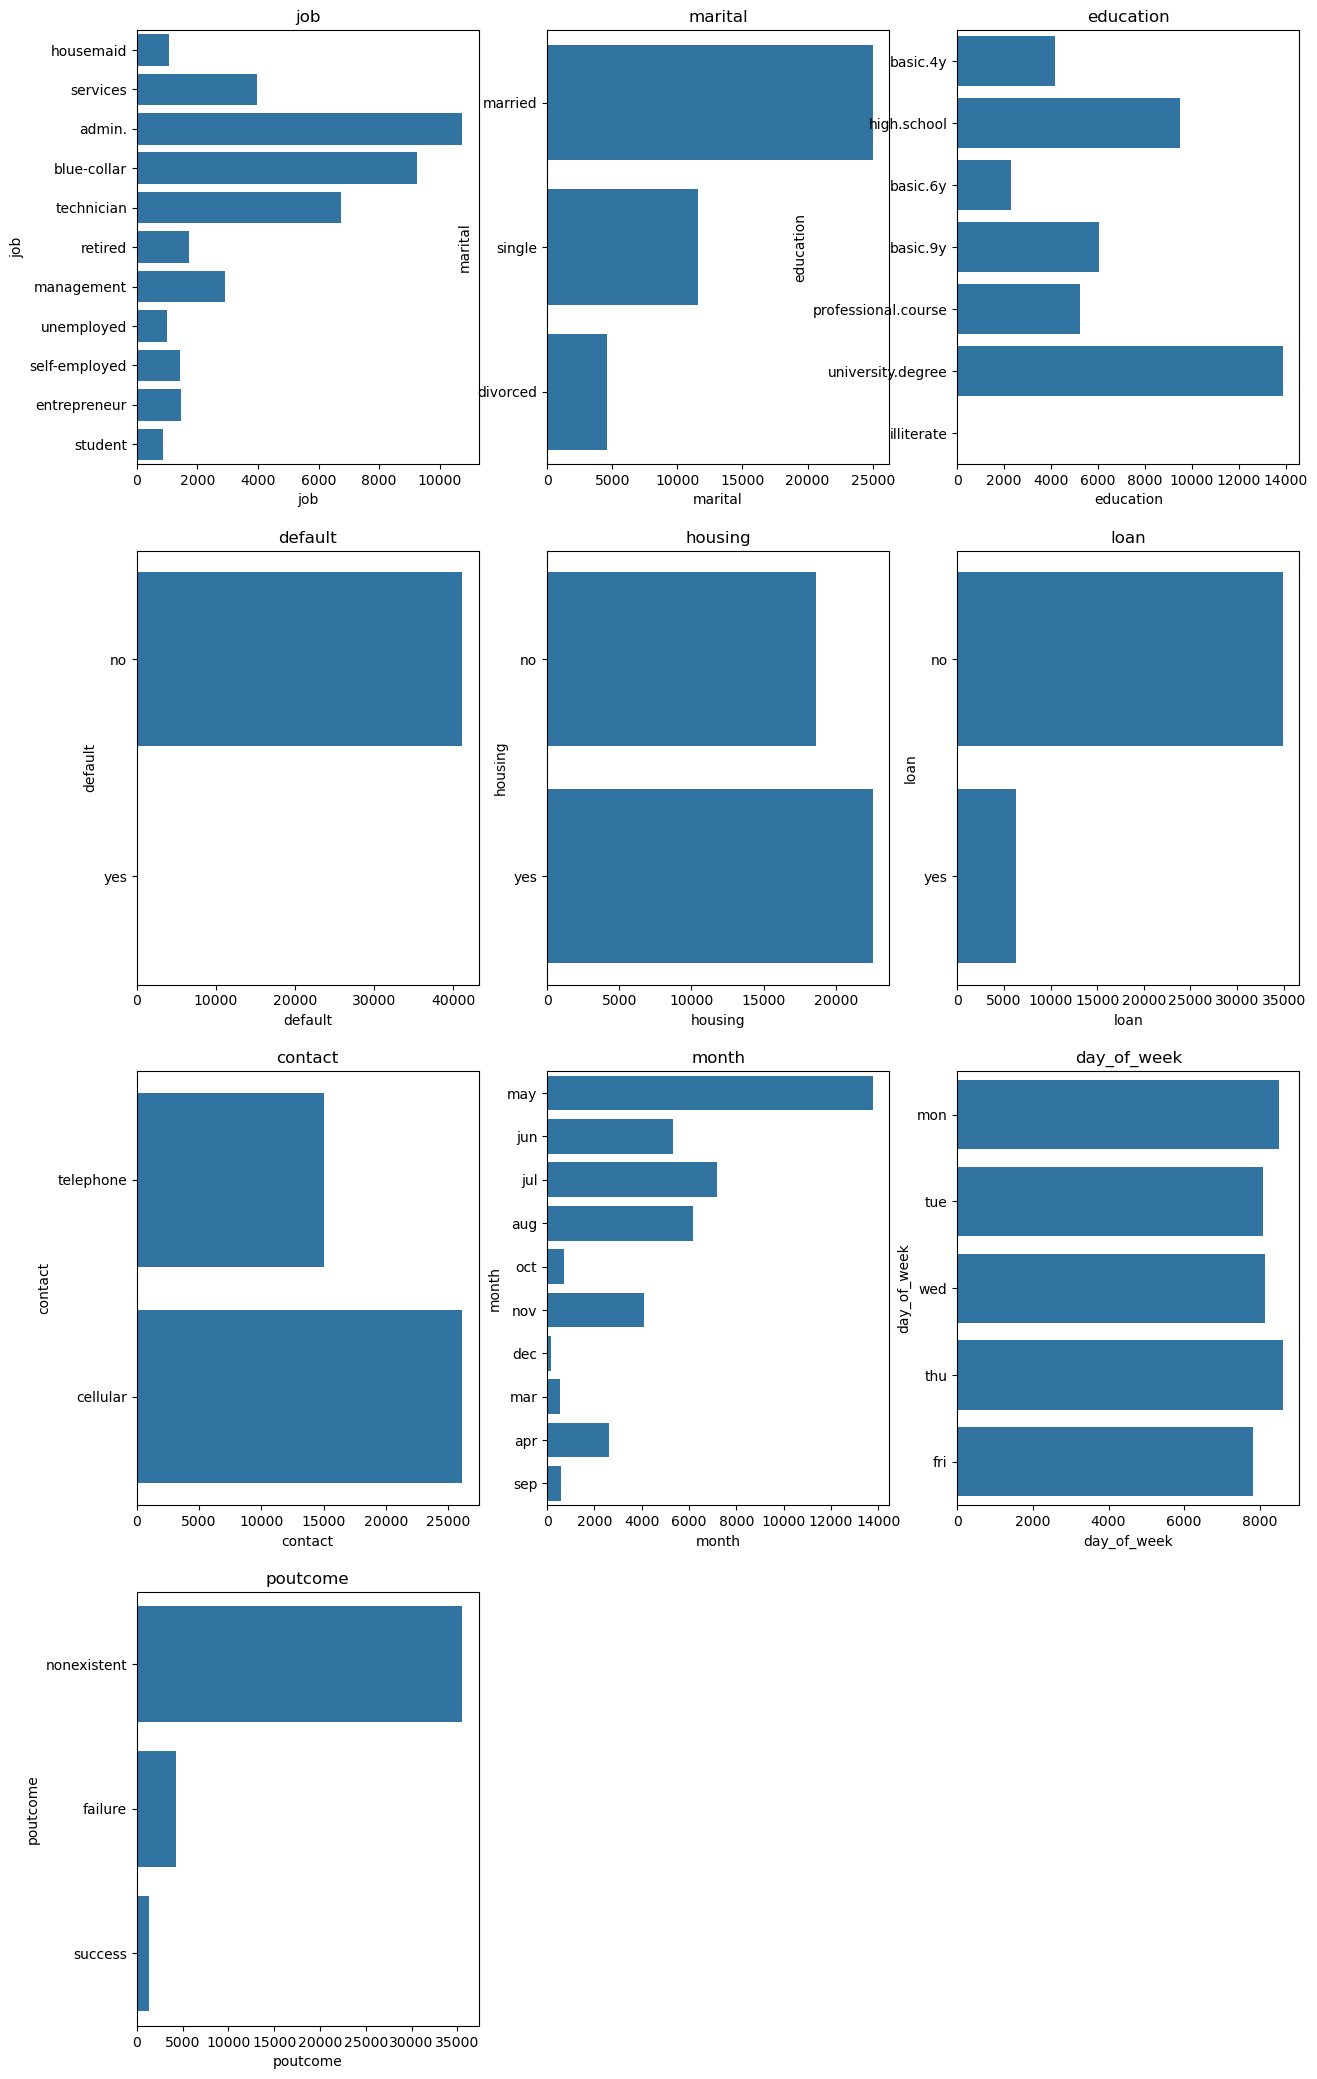

In [12]:
#DISTRIBUTION OF THE CATEGORICAL COLUMNS

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,80), facecolor = 'white')
plotnumber =1
for cat_column in cat_colums :
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y = cat_column,data=df)
    plt.xlabel(cat_column)
    plt.title(cat_column)
    plotnumber += 1
plt.show()

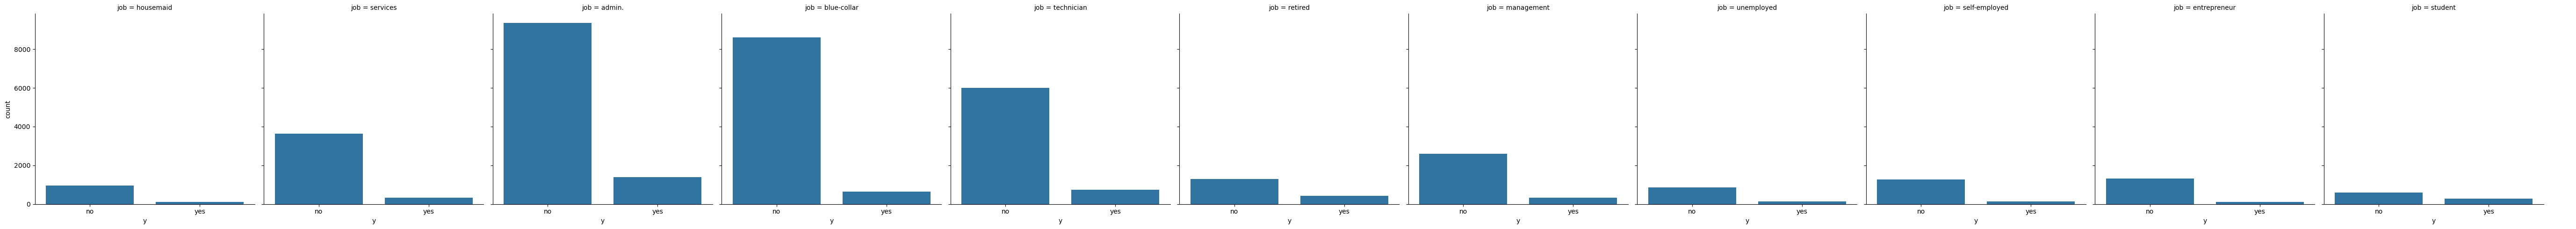

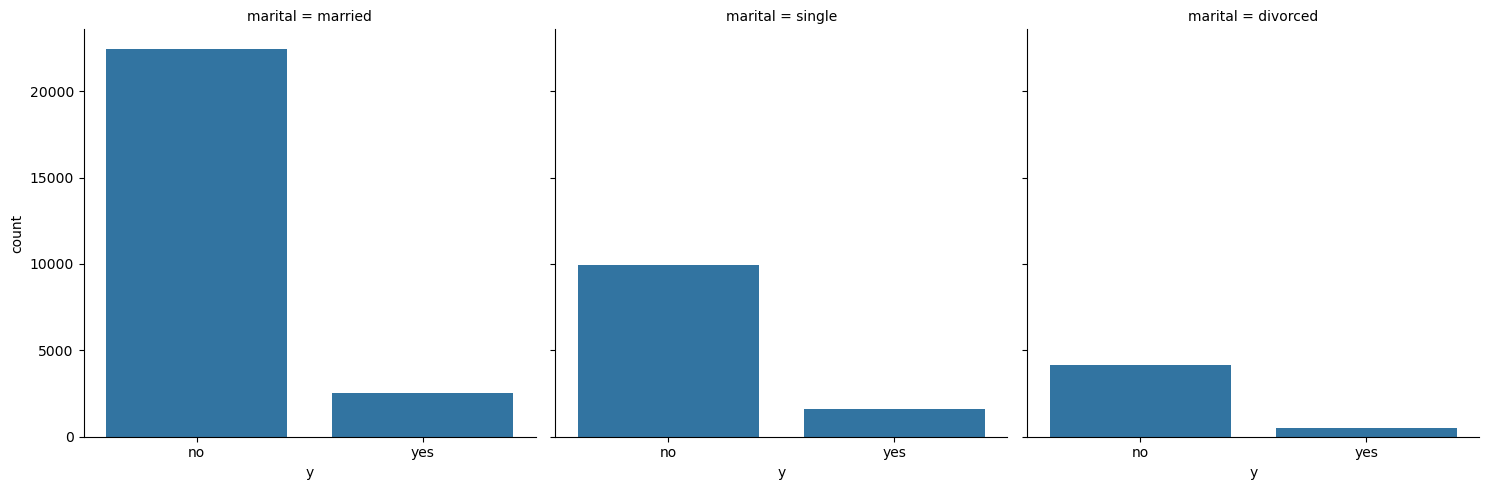

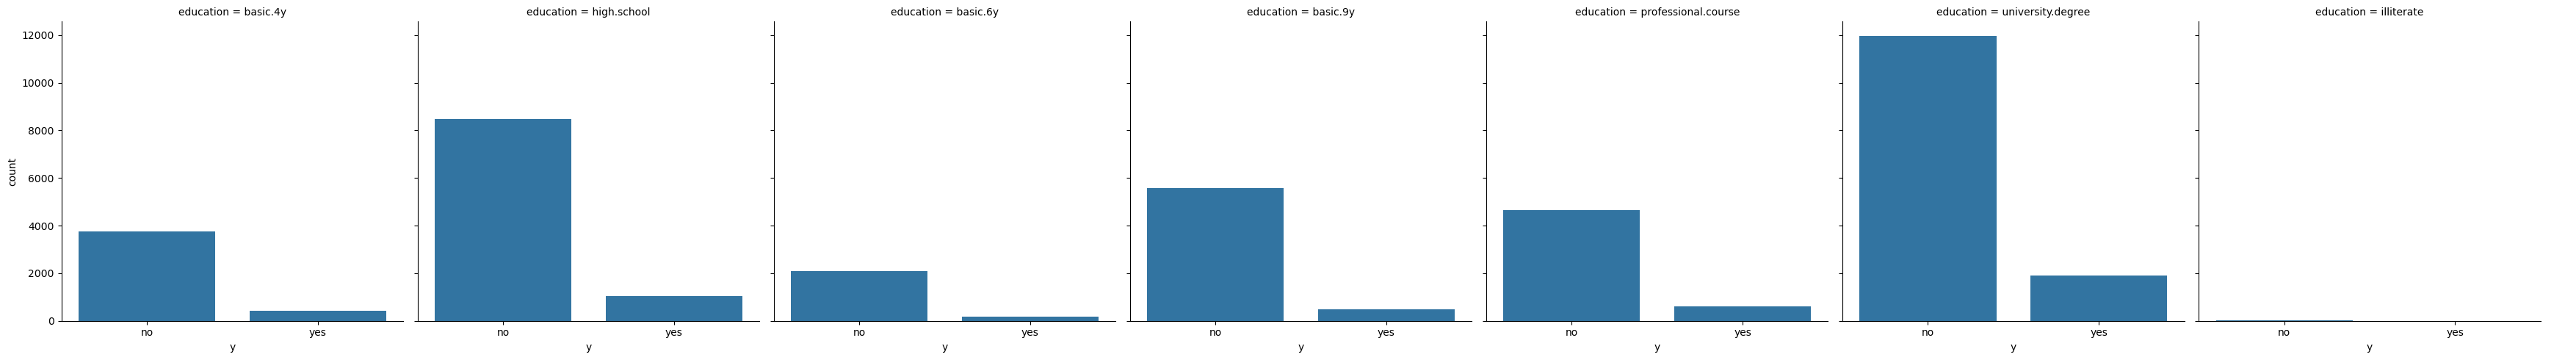

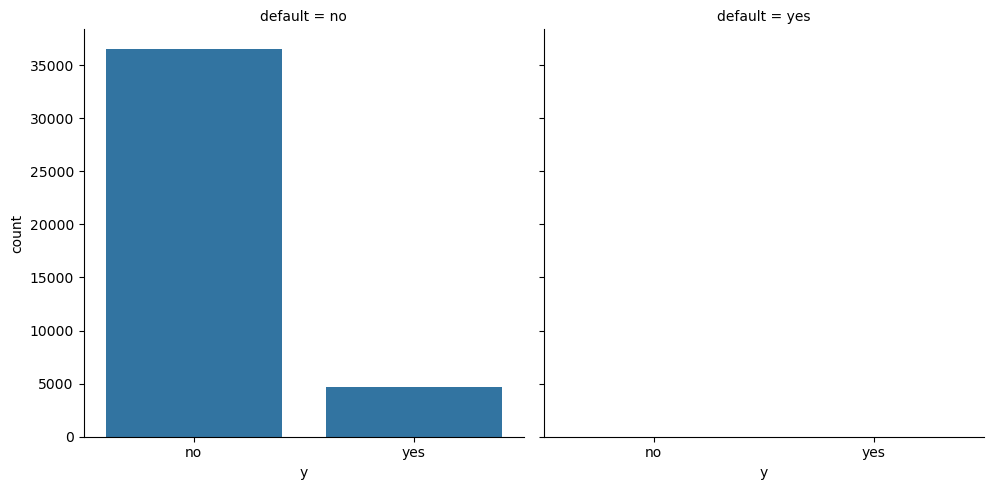

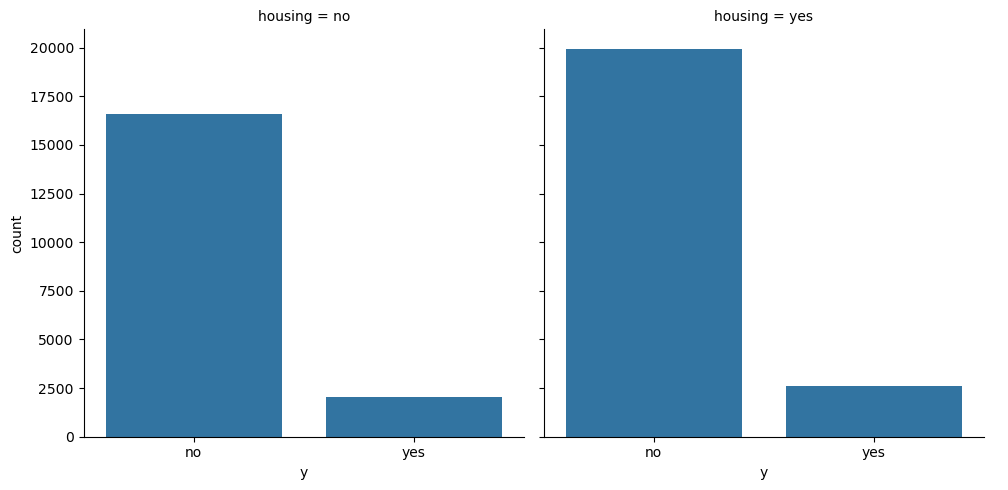

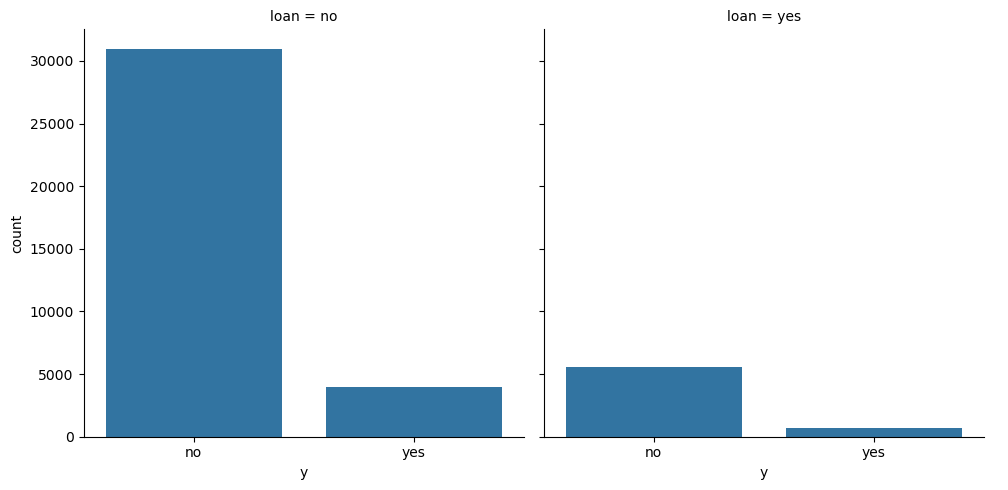

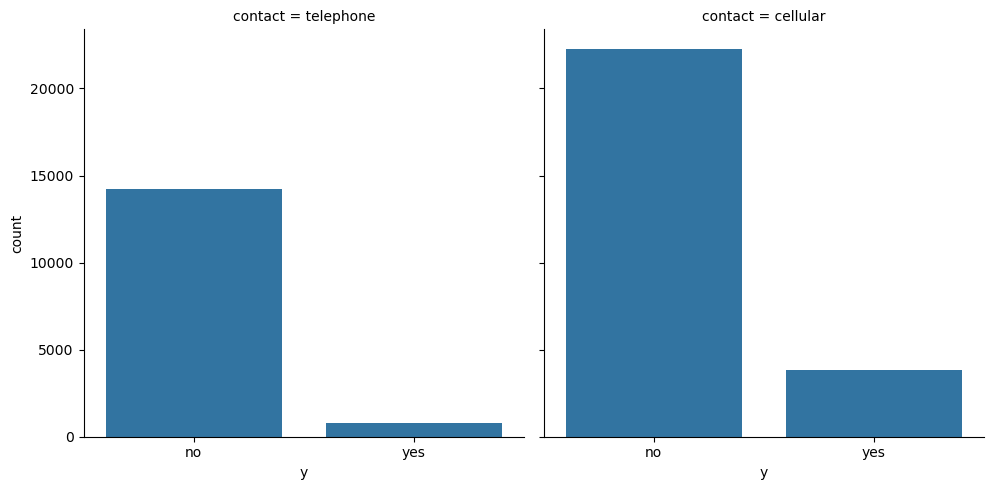

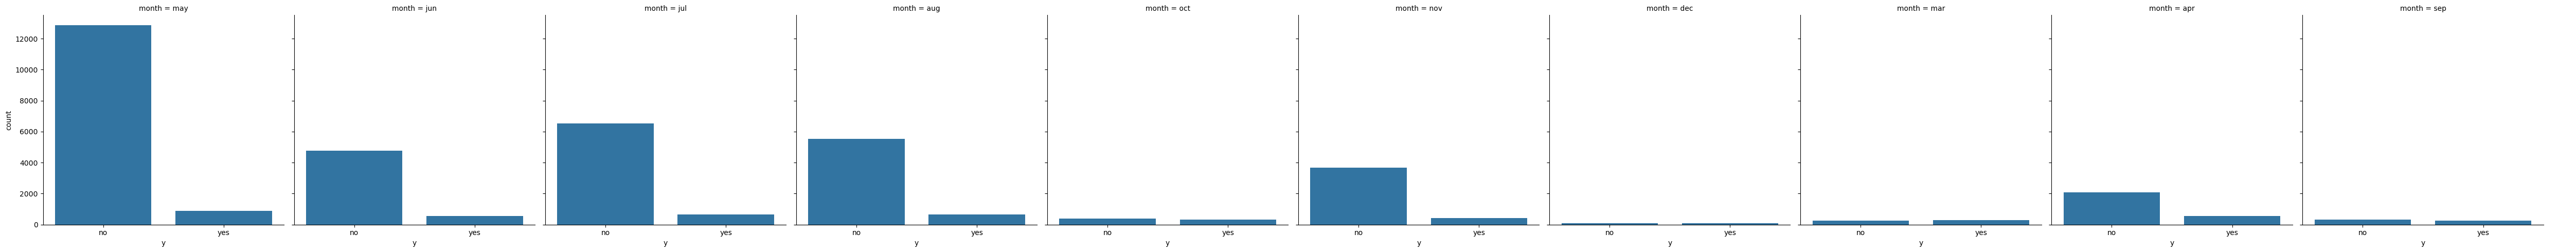

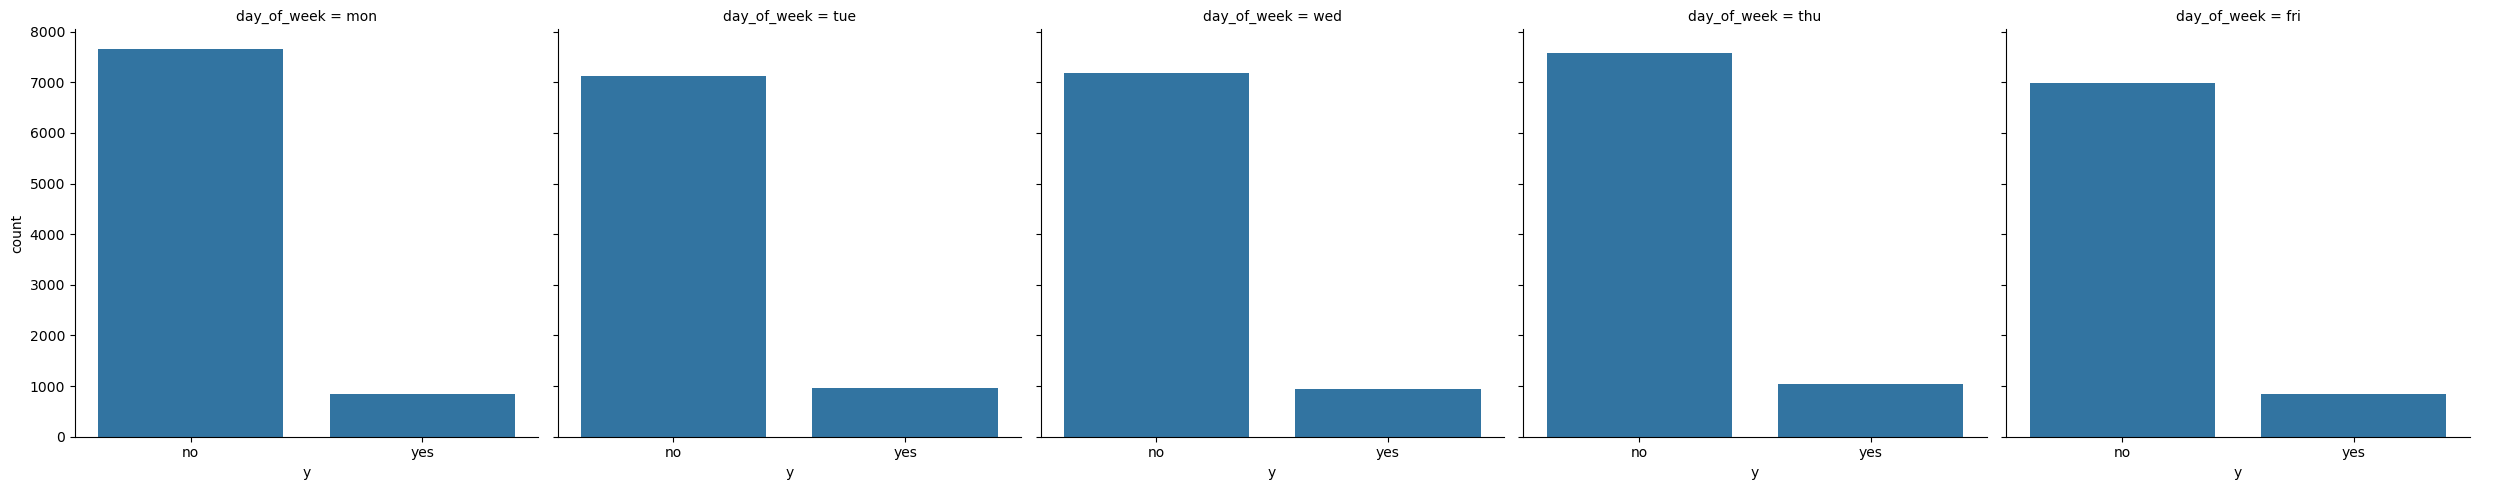

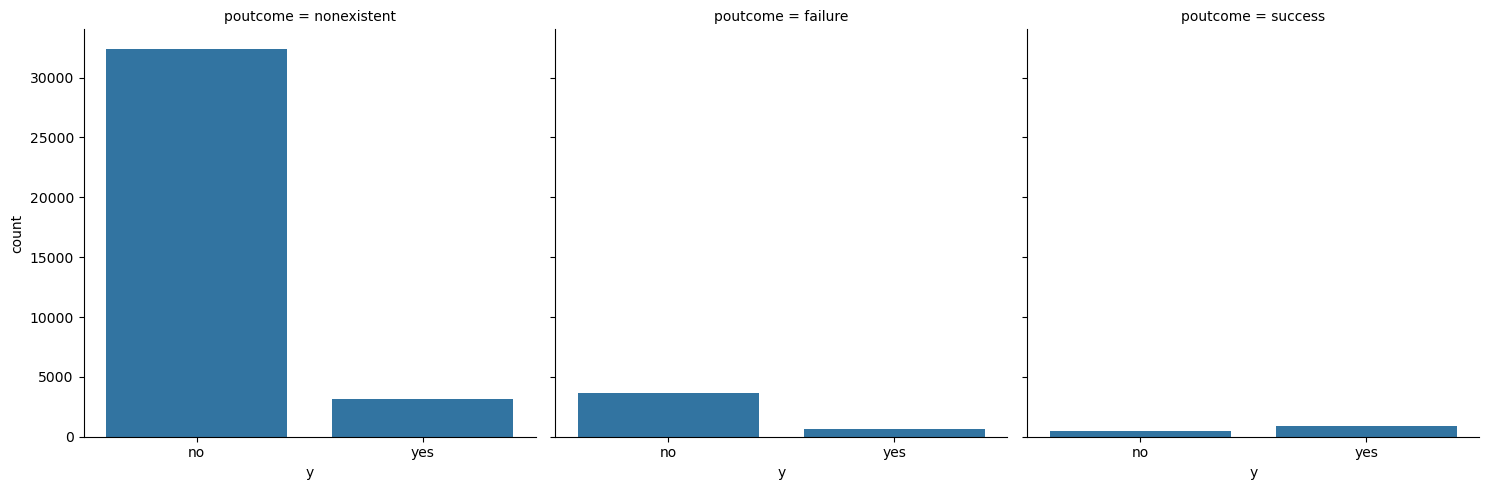

In [411]:
#RELATIONSHIP BETWEEN CATEGORICAL COLUMNS AND TARGET VARIABLE "y"

for cat_column in cat_colums :
     sns.catplot(x= 'y', col = cat_column ,kind = 'count',data=df)
plt.show()
    


In [13]:
#TARGET VARIABLE SPLIT OVER CATEGORICAL COLUMNS AND THEIR COUNTS

for cat_column in cat_colums :
    print(df.groupby(['y',cat_column]).size())


y    job          
no   admin.           9360
     blue-collar      8614
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1284
     self-employed    1272
     services         3644
     student           600
     technician       6009
     unemployed        870
yes  admin.           1388
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
dtype: int64
y    marital 
no   divorced     4135
     married     22456
     single       9944
yes  divorced      476
     married      2543
     single       1620
dtype: int64
y    education          
no   basic.4y                3747
     basic.6y                2103
     basic.9y                5572
     high.school             8481
     illiterate                14
     professio

In [14]:
#EXPLORING NUMERICAL COLUMNS

numeric_colums = df.select_dtypes(include=['int64','float64']).columns
print("numerical columns :",numeric_colums.tolist())

df[numeric_colums].describe()



numerical columns : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000,41174.000000
mean,40.023583,258.323627,2.567956,962.463035,0.173022,0.081865,93.575713,-40.503070,3.621231,5167.032805
std,10.420578,259.309058,2.770364,186.941469,0.494975,1.570899,0.578849,4.627877,1.734456,72.252395
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


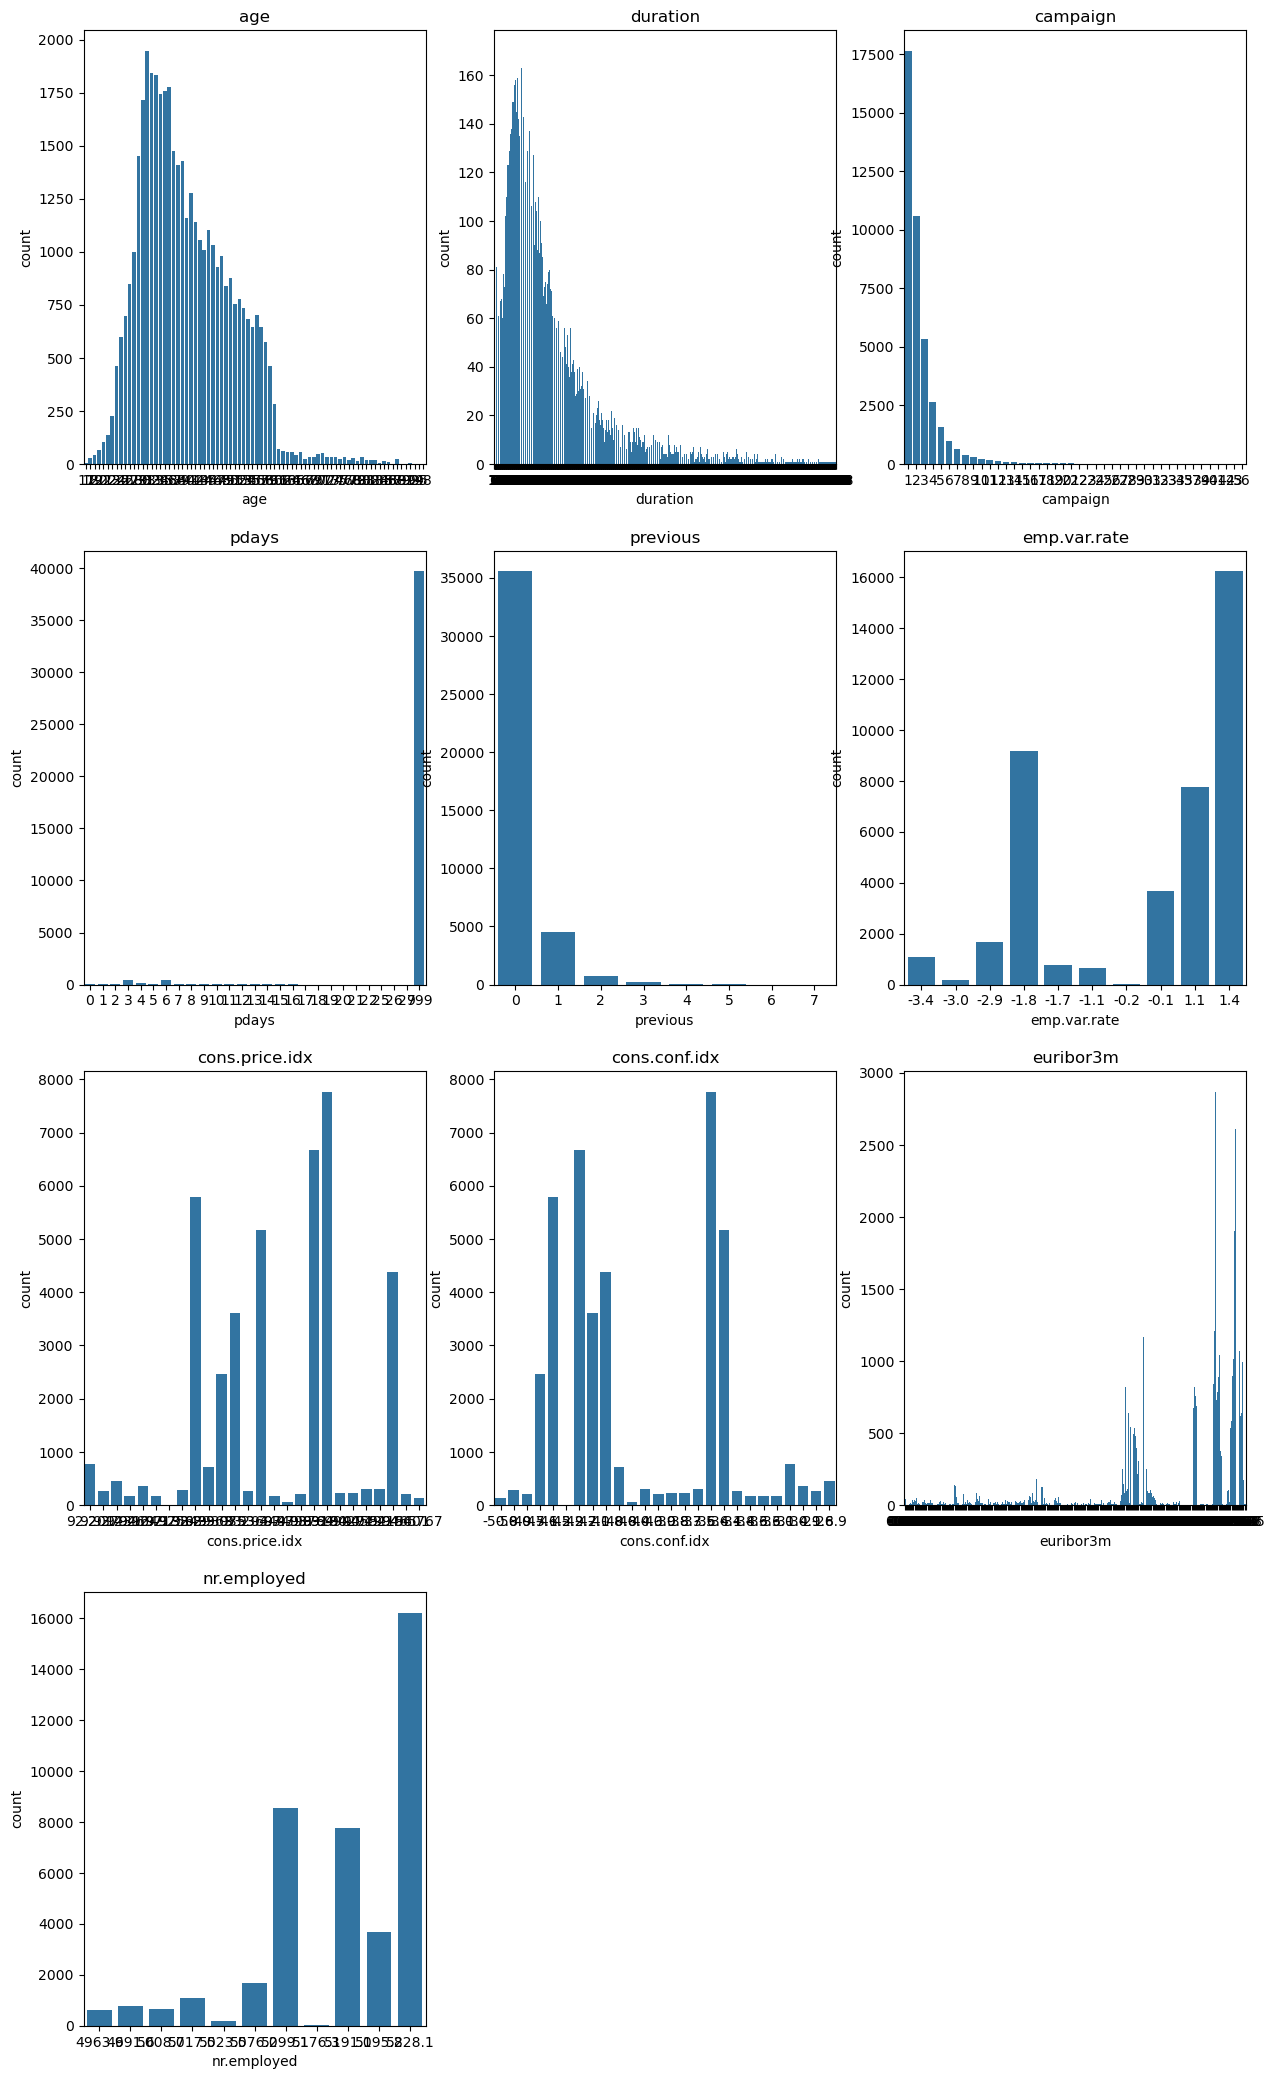

In [15]:
#DISTRIBUTION OF NUMERICAL COLUMNS

plt.figure(figsize=(15,80), facecolor = 'white')
plotnumber =1
for numeric_column in numeric_colums :
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(x = numeric_column,data=df)
    plt.title(numeric_column)
    plotnumber += 1
plt.show()

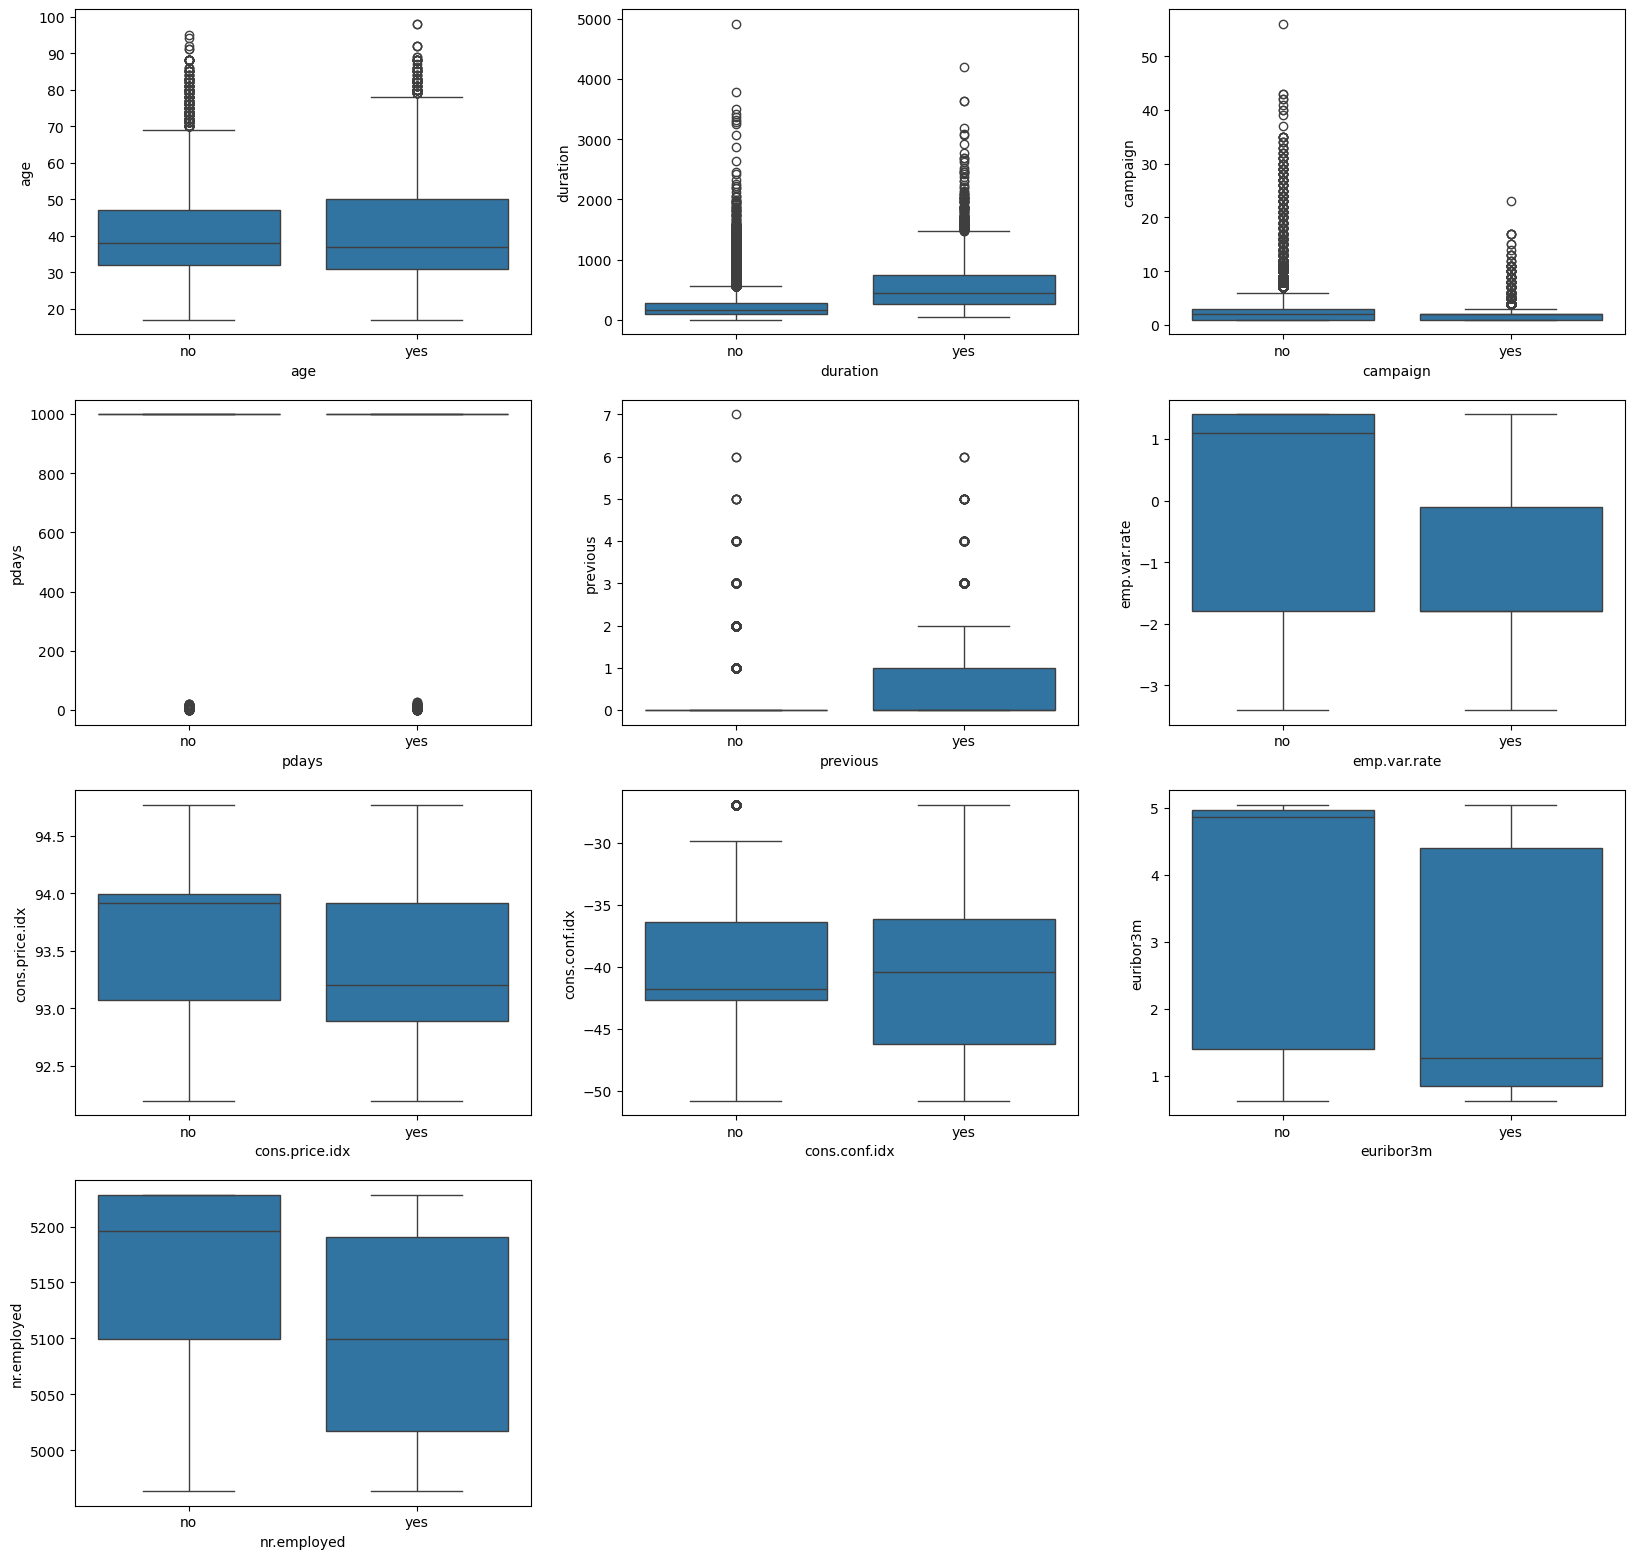

In [16]:
#RELATIONSHIP BETWEEN NUMERICAL COLUMNS AND TARGET VARIABLE "y"
#boxplot to show the relationship between target variable and numerical columns

plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber =1
for numeric_column in numeric_colums :
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x = 'y',y=df[numeric_column],data=df)
    plt.xlabel(numeric_column)
    plotnumber += 1
plt.show()

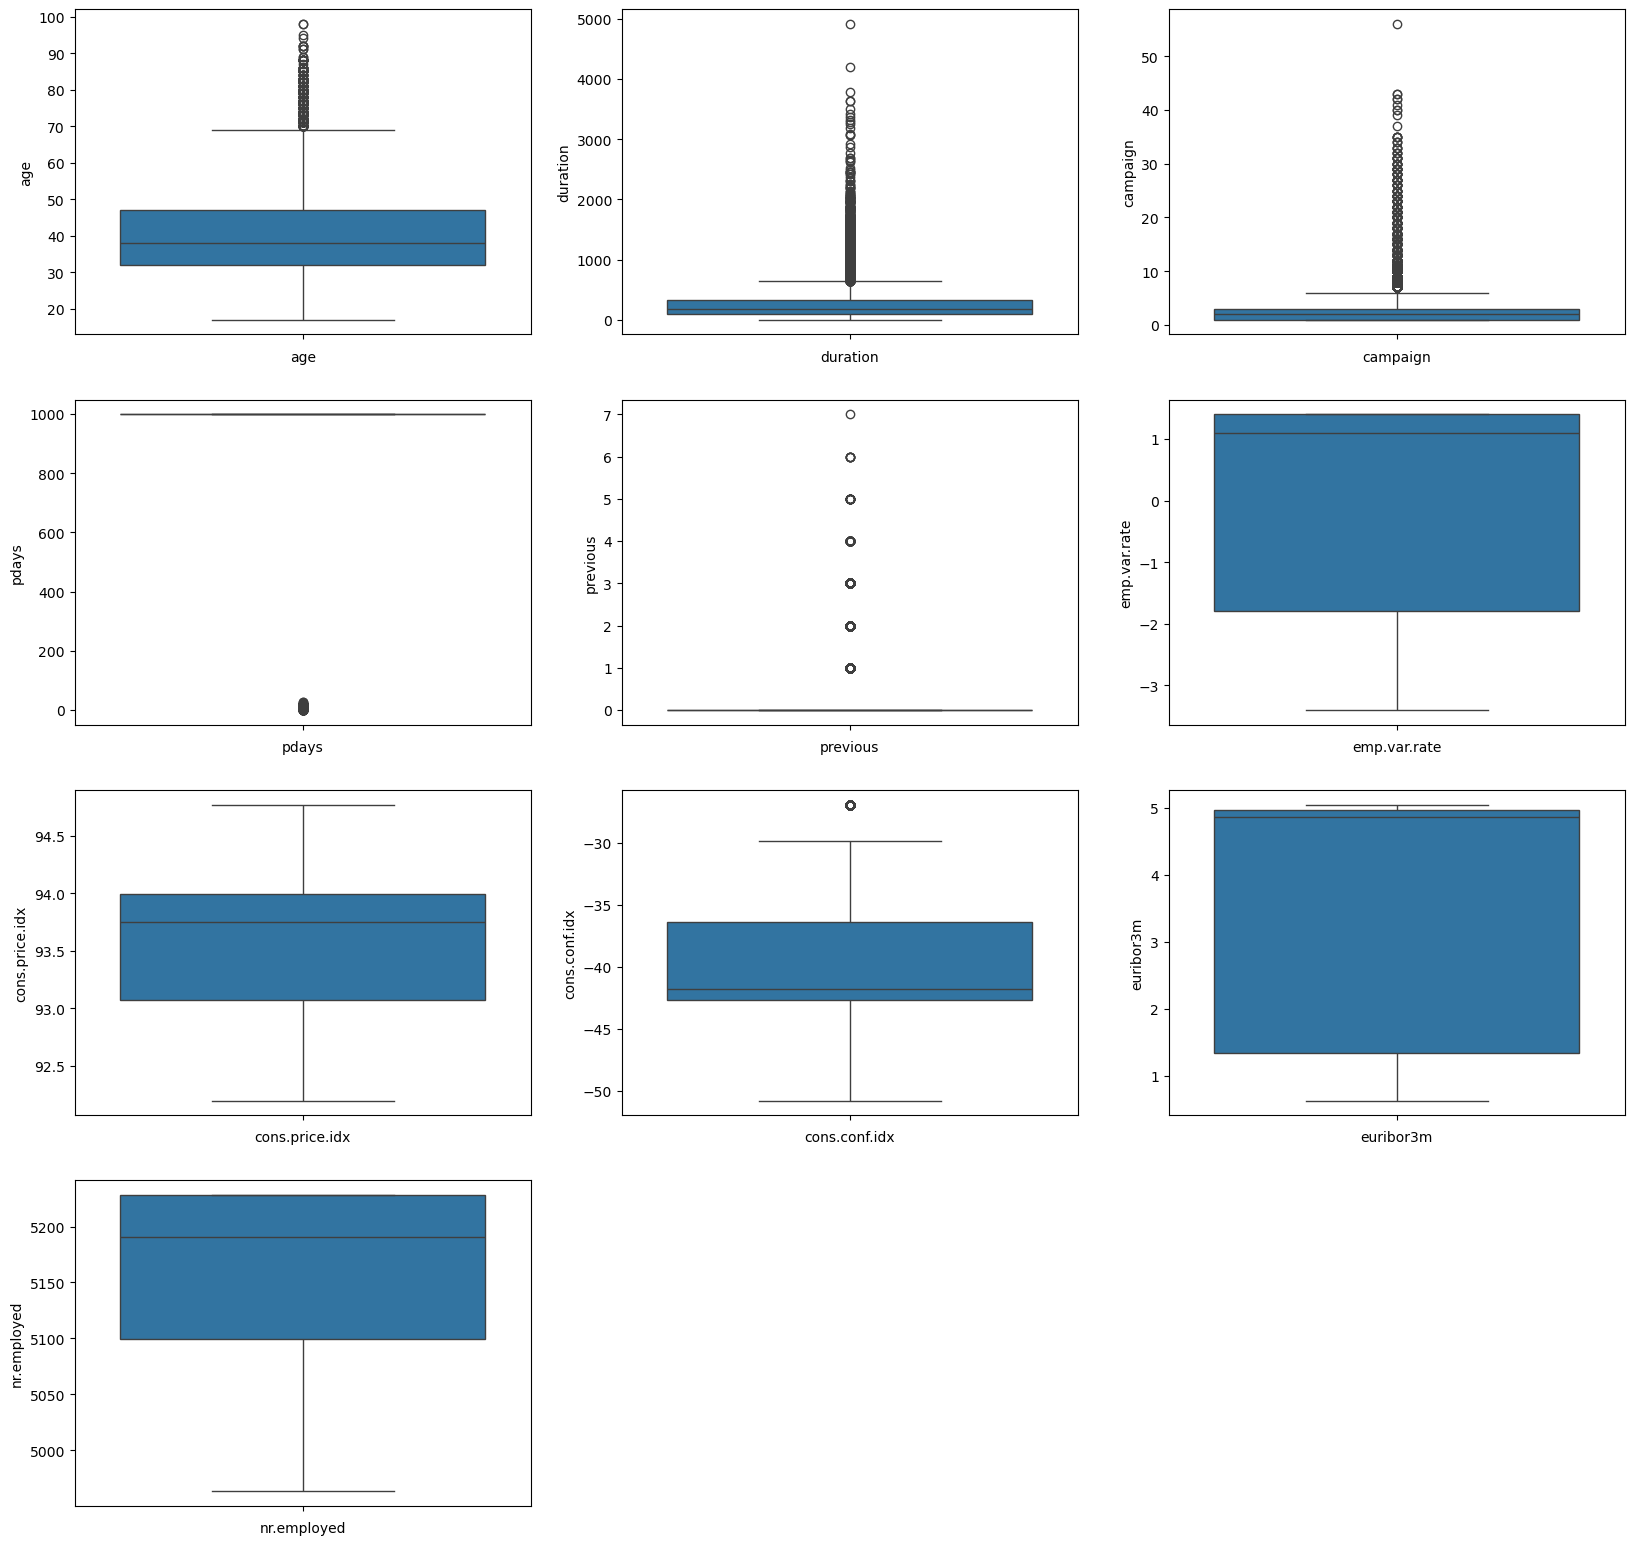

In [17]:
#FINDING OUTLIERS IN NUMERIAL COLUMNS
#box plot to find outliers in the numerical columns
plt.figure(figsize=(20,60), facecolor = 'white')
plotnumber =1
for numeric_column in numeric_colums :
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numeric_column])
    plt.xlabel(numeric_column)
    plotnumber += 1
plt.show()

<Axes: >

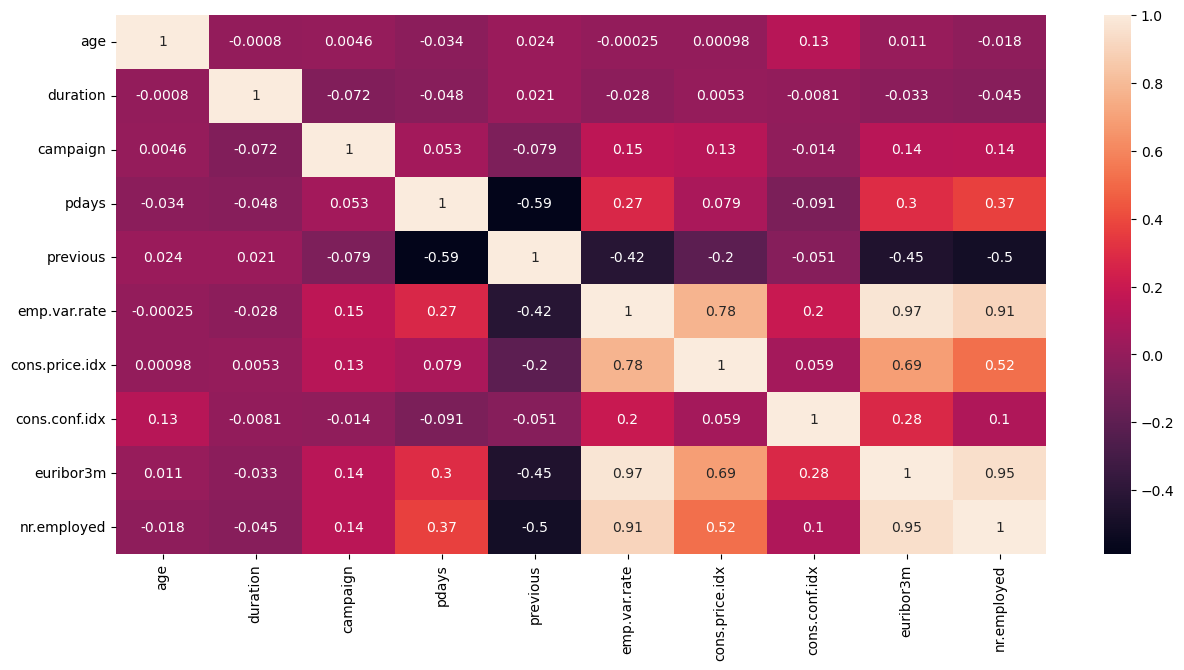

In [18]:
#EXPLORING THE CORRELATION BETWEEN NUMERICAL COLUMNS
cor_mat = df[numeric_colums].corr()
fig= plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

In [19]:
df1 =df.copy()

In [20]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: >

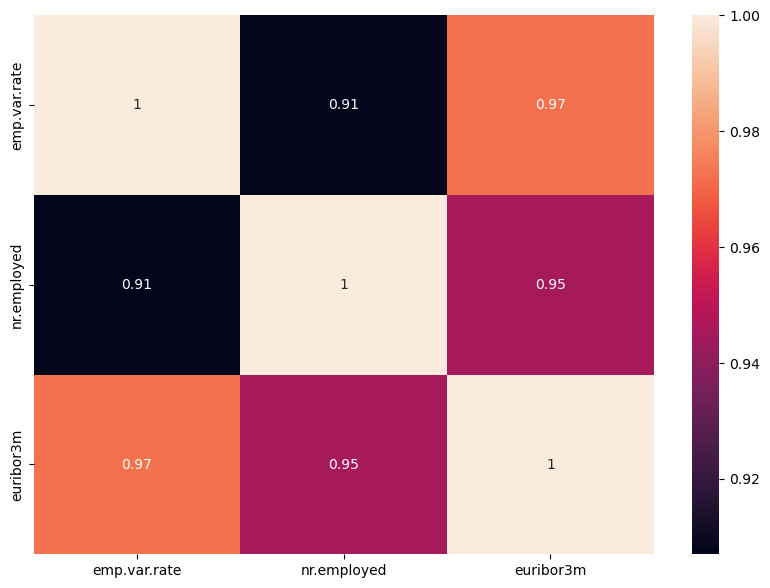

In [21]:
#POSITIVE HIGH CORRELATION BETWEEN 'emp.var.rate','nr.employed','euribor3m'

cor_mat = df1[['emp.var.rate','nr.employed','euribor3m']].corr()
fig= plt.figure(figsize=(10,7))
sns.heatmap(cor_mat,annot=True)

In [22]:
#SINCE THERE IS A POSITIVE HIGH CORRELATION BETWEEN 'emp.var.rate','nr.employed'AND'euribor3m
#emp.var.rate and nr.employed are redundant because they provide no unique information so we drop them
df1.drop(['emp.var.rate','nr.employed'],axis =1 ,inplace =True)
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,149,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [23]:
#we also drop duration column
#reason is for predictive modeling features must be known at decision time.Duration is only known post-call making it unsuitable for real time prediction

df1.drop(['duration'],axis =1 ,inplace =True)


In [24]:
df1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


In [25]:
#we drop default column because 99% of default values = no
print("default column distribution: ")
print(df1['default'].value_counts())
print('\nPercentage Distribution:')
print(df1['default'].value_counts(normalize=True) * 100)

default column distribution: 
default
no     41171
yes        3
Name: count, dtype: int64

Percentage Distribution:
default
no     99.992714
yes     0.007286
Name: proportion, dtype: float64


In [26]:
#dropping the default column
df1.drop(['default'],axis =1 ,inplace =True)

In [29]:
df1.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,no


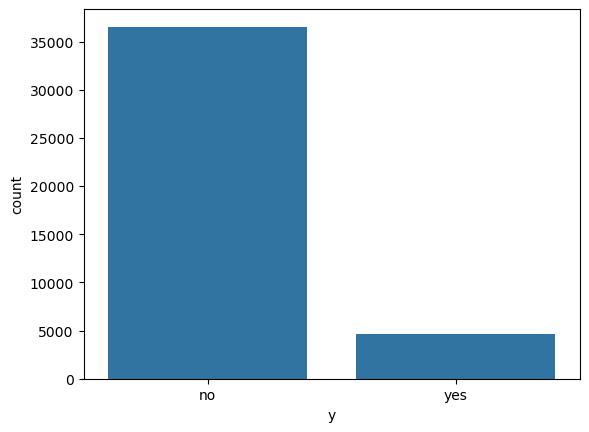

In [35]:
#CHECKING TO SEE IF DATA IS BALANCED WITH RESPECT TO Y
sns.countplot(x='y',data=df1)
plt.show()



In [36]:

cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df1 = pd.concat([df1.drop(col, axis=1),pd.get_dummies(df1[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [37]:

bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df1[col+'_new']=df1[col].apply(lambda x : 1 if x == 'yes' else 0)
    df1.drop(col, axis=1, inplace=True)



In [38]:
df1.head()

,age,day_of_week,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success,housing_new,loan_new,y_new
0,56,mon,1,999,0,93.994,-36.4,4.857,False,False,...,False,True,False,False,False,True,False,0,0,0
1,57,mon,1,999,0,93.994,-36.4,4.857,False,False,...,False,True,False,False,False,True,False,0,0,0
2,37,mon,1,999,0,93.994,-36.4,4.857,False,False,...,False,True,False,False,False,True,False,1,0,0
3,40,mon,1,999,0,93.994,-36.4,4.857,False,False,...,False,True,False,False,False,True,False,0,0,0
4,56,mon,1,999,0,93.994,-36.4,4.857,False,False,...,False,True,False,False,False,True,False,0,1,0


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


In [40]:
cat_columns = df.select_dtypes(include=['object']).columns.drop('y')
for col in cat_columns:
    df[col] = df[col].replace('unknown', df[col].mode()[0])

In [41]:
print("initial_shape:", df.shape)
df = df.drop_duplicates()
print("final_shape:", df.shape)

initial_shape: (41174, 21)
final_shape: (41174, 21)


In [42]:
numeric_columns = ['age', 'duration', 'campaign', 'pdays', 'previous', 
                   'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 
                   'euribor3m', 'nr.employed']
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 
               'loan', 'contact', 'month', 'day_of_week', 'poutcome']

In [43]:
# DEFINE X AND y
X = df.drop('y', axis=1)
y = df['y']

In [44]:

# TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                     random_state=42, stratify=y)

In [45]:
# CREATING PREPROCESSING PIPELINE
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_columns)
    ])


In [46]:
# CREATING MODEL PIPELINE WITH CLASS WEIGHTS
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(class_weight='balanced', 
                                          random_state=42, n_estimators=100))
])


In [47]:
# TRAIN THE MODEL
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [49]:
y_pred = pipeline.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.97      0.95      7307
         yes       0.66      0.42      0.51       928

    accuracy                           0.91      8235
   macro avg       0.79      0.70      0.73      8235
weighted avg       0.90      0.91      0.90      8235



In [50]:
# Train the model

# Save the pipeline
import joblib
joblib.dump(pipeline, 'bank_marketing_model.pkl')

['bank_marketing_model.pkl']